<a href="https://colab.research.google.com/github/Otobi1/Back-to-Basics-A-Refresher-/blob/master/Back_to_Basics_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
## Understanding linear regression, the math, NumPy and PyTorch implementation 

# y = XW + b (linear model)

# where y is the prediction, X is the input(s), W is the weight and b is the bias

In [8]:
# the objective is to use the input X to predict the output y using a linear model.
# the model will be a line of best fit that minimises the distance between the predicted (model output) and the target (ground truth) values 

# Training data (X, y) is used to train the model and learn the weights W using gradient descent.

In [9]:
# Generating the data

# - for this exercise, we will generate some dummy data to apply linear regression on. 
# - it will create roughly linear data (y = 3.5x + noise)
# - the random noise will be added to create realistic data that doesn't perfectly align in a line.
# - there will be slight variance since we added some noise 

In [18]:
# Importing the necessary libraries 

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
print ("Libraries successfully imported")

Libraries successfully imported


In [19]:
# set seed for reproducibility 
SEED = 1234
NUM_SAMPLES = 50

np.random.seed(SEED)

In [20]:
# Generating dummy data

def generate_data(num_samples):
  """Generate dummy data for linear regression"""
  X = np.array(range(num_samples))
  random_noise = np.random.uniform(-10,20,size = num_samples)
  y = 3.5 * X + random_noise # add some noise
  return X, y

In [21]:
# Generate random (linear) data

X, y = generate_data(num_samples = NUM_SAMPLES)
data = np.vstack([X, y]).T
print (data[:5])

[[ 0.         -4.25441649]
 [ 1.         12.16326313]
 [ 2.         10.13183217]
 [ 3.         24.06075751]
 [ 4.         27.39927424]]


In [23]:
# Loading data into the Pandas DataFrame

df = pd.DataFrame(data, columns = ["X", "y"])
X = df[["X"]].values
y = df[["y"]].values
df.head()

,X,y
0,0.0,-4.254416
1,1.0,12.163263
2,2.0,10.131832
3,3.0,24.060758
4,4.0,27.399274


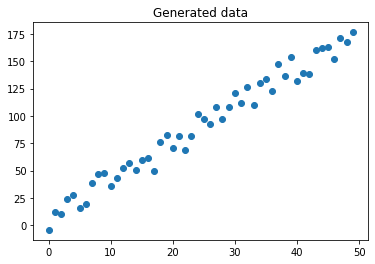

In [24]:
# Making a scatter plot 
plt.title("Generated data")
plt.scatter(x = df["X"], y = df["y"])
plt.show()

In [ ]:
## Numpy implementation 